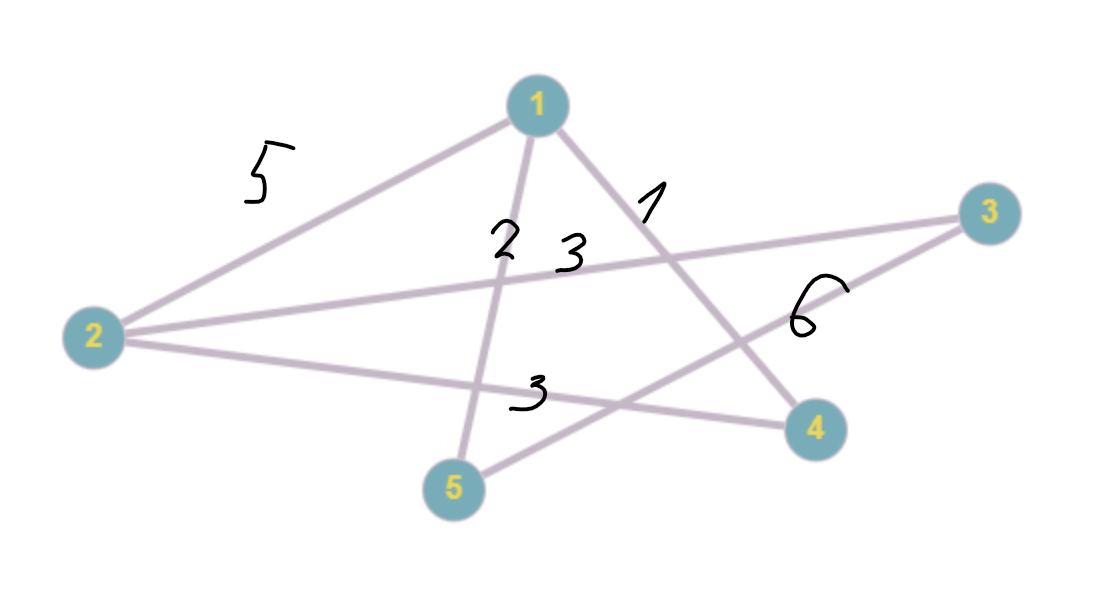

In [1]:
public static void print(int[] list)
{
    for (int i=0;i<list.Length;i++)
    {
        Console.Write((list[i]==2147483647 ? "+inf" : list[i]) + " "); //2147483647 это бесконечность
    }
    Console.WriteLine();
}
public static void print(bool[] list)
{
    for (int i=0;i<list.Length;i++)
    {
        Console.Write((list[i] ? 1 : 0) + " ");
    }
    Console.WriteLine();
}
private static void printgr(int[] parent, int[,] graph, int V)
{
    Console.WriteLine("Ребро Вес");
    for (int i = 1; i < V; i++)
    {
        Console.WriteLine((parent[i]+1) + " - " + (i+1) + "\t" + graph[i, parent[i]]);
    }
}

In [12]:
class Prima
{
    private static int FindMinKey(int[] wgh, bool[] isworked, int V) //нахождение вершины с минимальным весом до нее, которая еще не обратона (не включена в остовное дерево)
    //wgh - массив весов до каждой вершины
    //isworked - обработана ли вершина
    //v - количество вершин в графе
    {
        int min = int.MaxValue; //максимальное значение которое может принимать int32, 2147483647
        int minv = -1;

        for (int v = 0; v < V; v++)
        {
            if (isworked[v] == false && wgh[v] < min) 
            {
                min = wgh[v];//минимальный вес из необработанных вершин
                minv = v;//индекс вершины с минимальным весом до нее
            }
        }

        return minv;
    }

    public static int AlgPrima(int[,] graph, int[] wgh, int[] parent, bool[] isworked, int V, int count,int S)
    {
        //parent - массив с родительскими вершинами
        //count - счетчки количества ребер в остновном дереве
        if (count == V - 1)
        {
            printgr(parent, graph, V);
            return S;
        }

        int u = FindMinKey(wgh, isworked, V);

        isworked[u] = true;
        
        for (int v = 0; v < V; v++)
        {
            if (graph[u, v] != 0 && isworked[v] == false && graph[u, v] < wgh[v]) //если вес не равен 0, вершина не обработана, 
            {
                parent[v] = u;
                wgh[v] = graph[u, v];
                S+=graph[v, parent[v]];
            }
        }
        AlgPrima(graph, wgh, parent, isworked, V, count + 1,S);
        return S;
    }
}

In [10]:
int[,] graph = new int[,]  {{0, 5, 0, 1, 2},
                            {5, 0, 3, 3, 0},
                            {0, 3, 0, 0, 6},
                            {1, 3, 0, 0, 0},
                            {2, 0, 6, 0, 0}};
int V = 5;

In [13]:
//Алгоритм Прима
int[] wgh = new int[V];
int[] parent = new int[V];
bool[] isworked = new bool[V];

for (int i = 0; i < V; i++)
{
    wgh[i] = int.MaxValue;
    isworked[i] = false;
}

wgh[0] = 0;
parent[0] = -1;
Prima.AlgPrima(graph, wgh, parent, isworked, V, 0,0) //Длина Минимального Остовного Дерева

Ребро Вес
4 - 2	3
2 - 3	3
1 - 4	1
1 - 5	2


8